In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score


from sklearn.preprocessing import StandardScaler

## **EDA**

In [2]:
csv = pd.read_csv('heart.csv', sep=',')
csv

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
csv.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
csv.shape

(918, 12)

In [5]:
csv.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
csv.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
csv.HeartDisease.unique()

array([0, 1], dtype=int64)

In [8]:
csv.loc[csv['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [9]:
csv.loc[csv['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [10]:
df = csv[csv.Cholesterol != 0]
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df.shape

(746, 12)

In [12]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


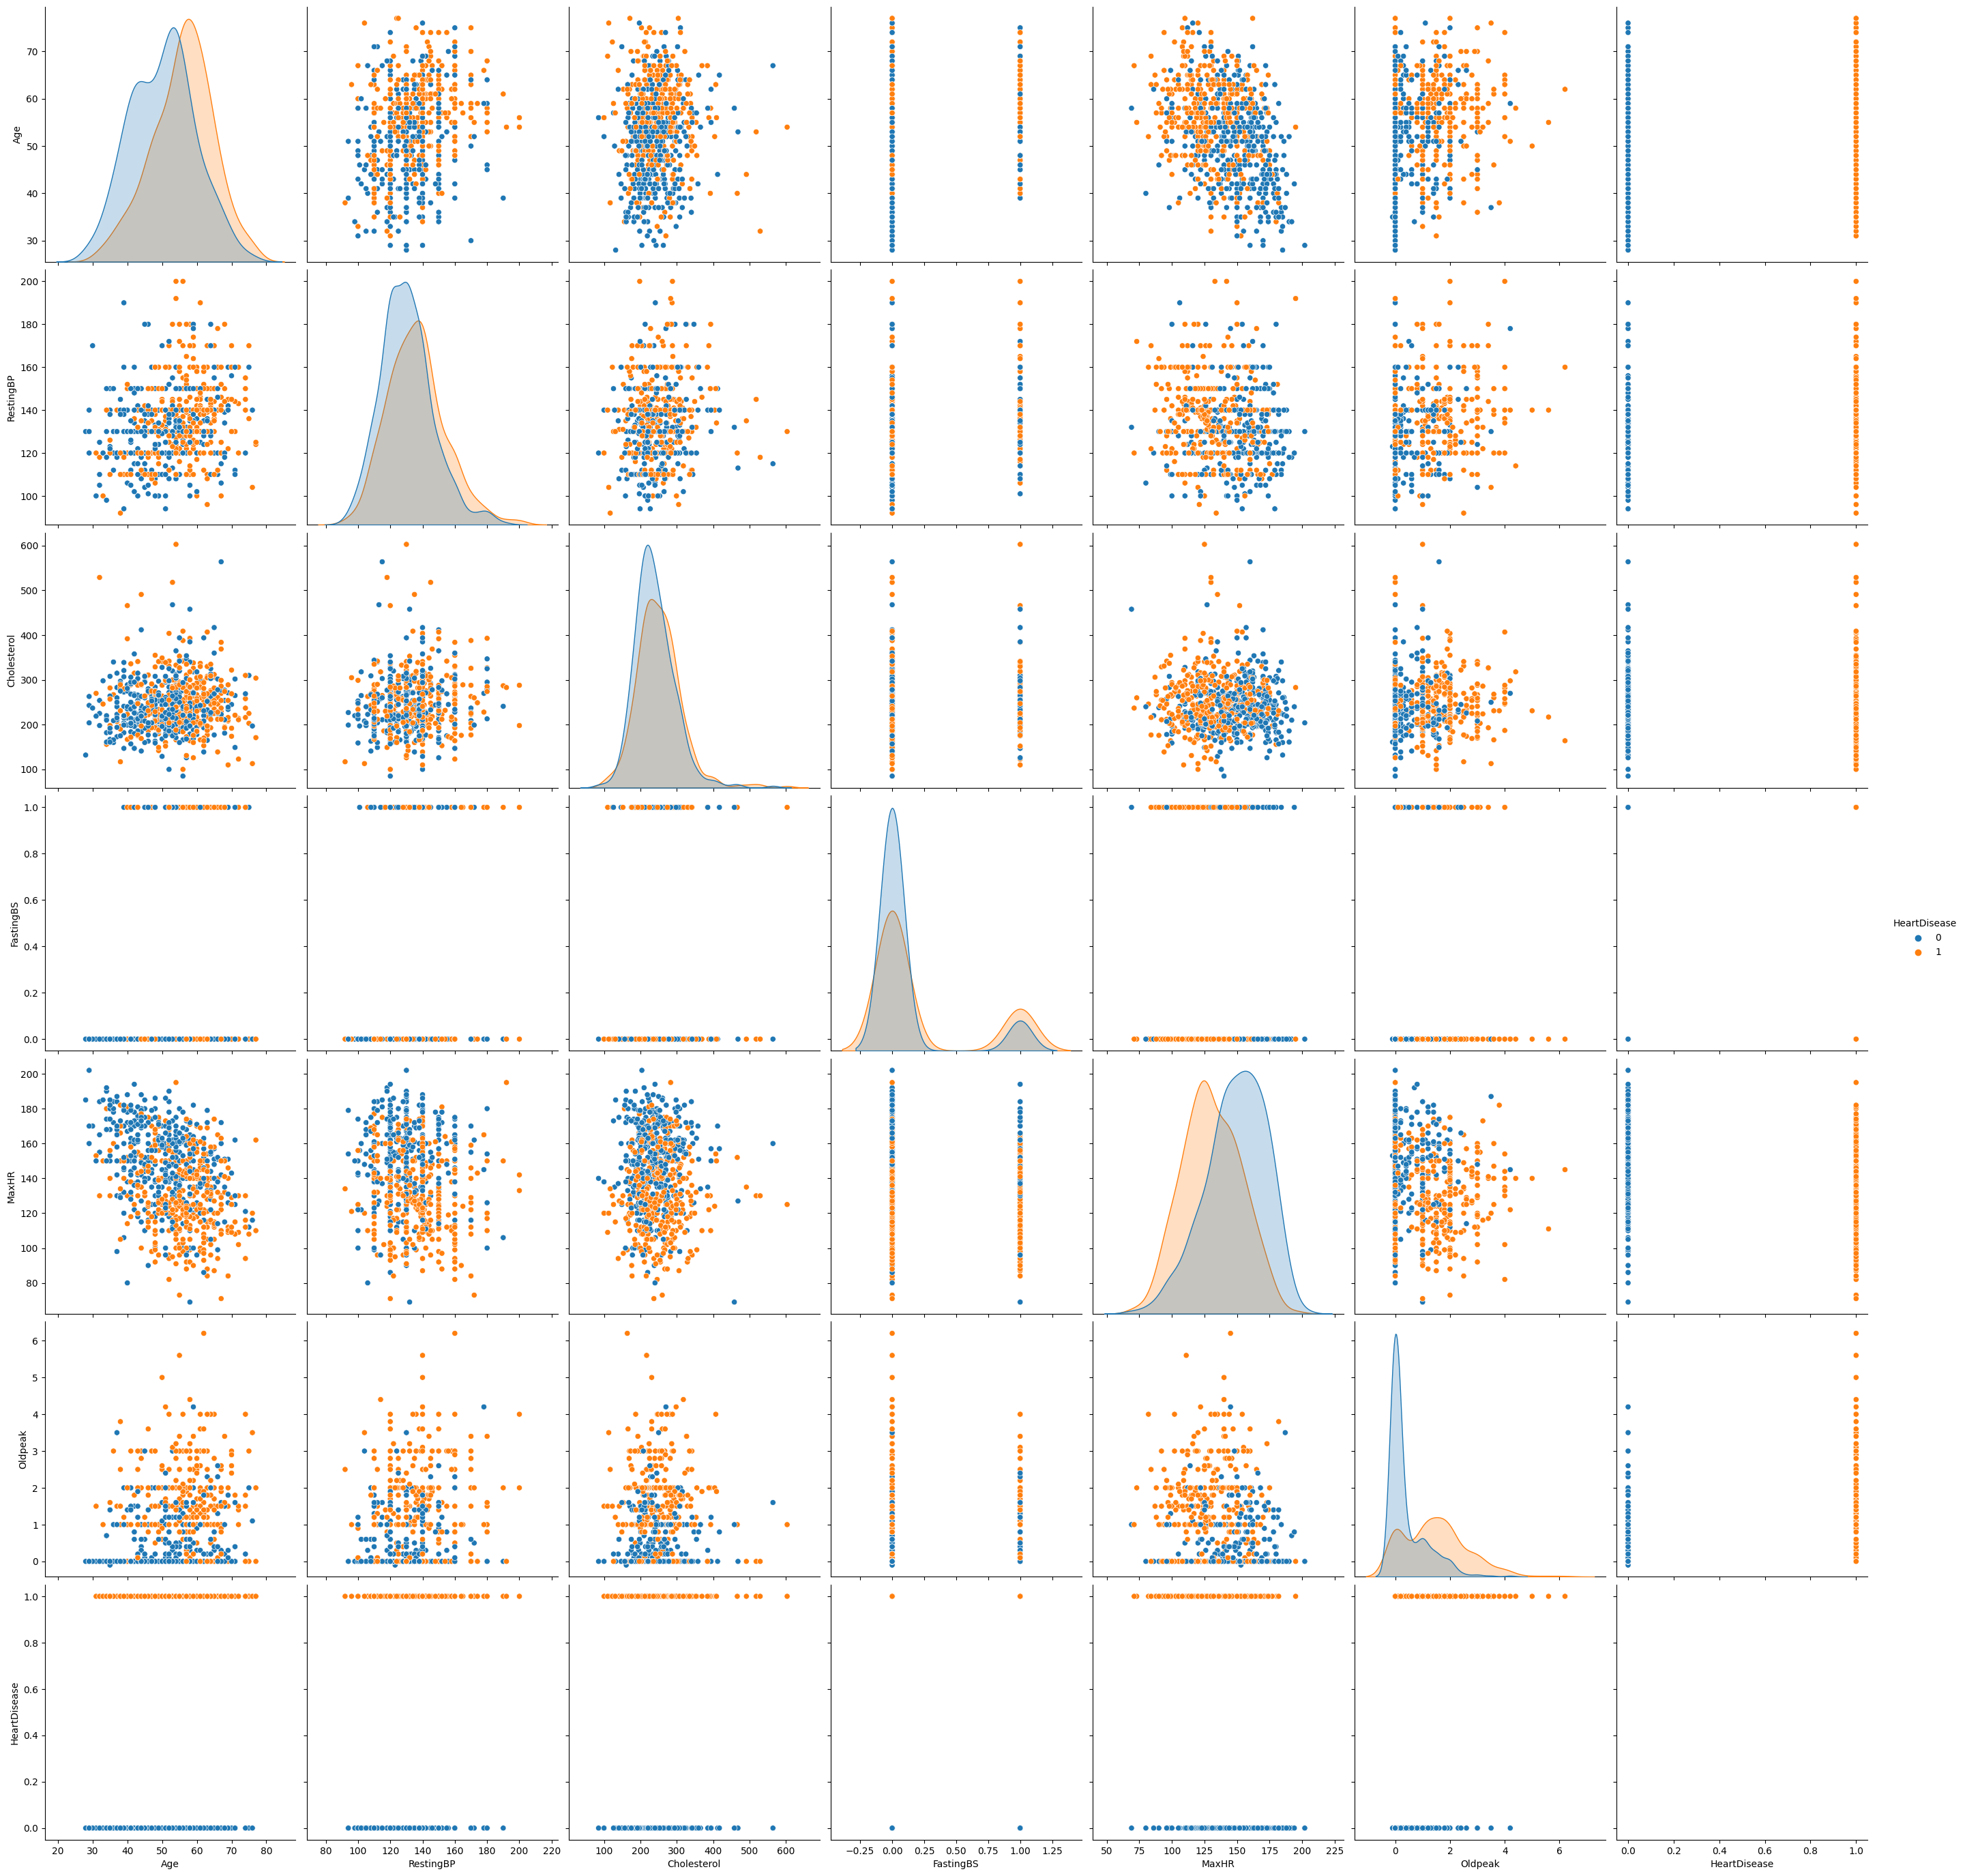

In [13]:
sns.pairplot(df,
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"],
             kind="scatter");

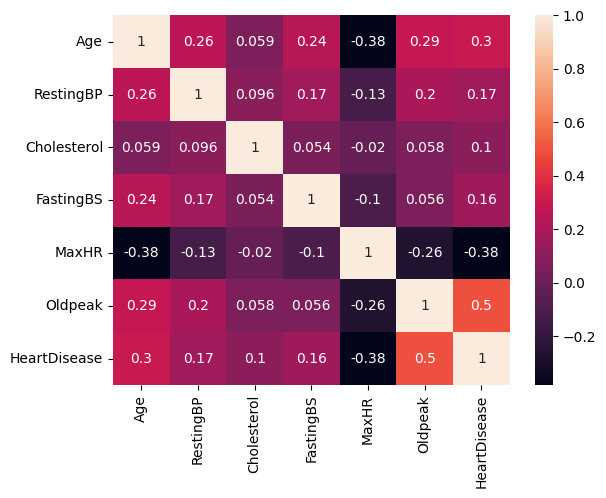

In [14]:
sns.heatmap(df.corr(), annot=True) ;

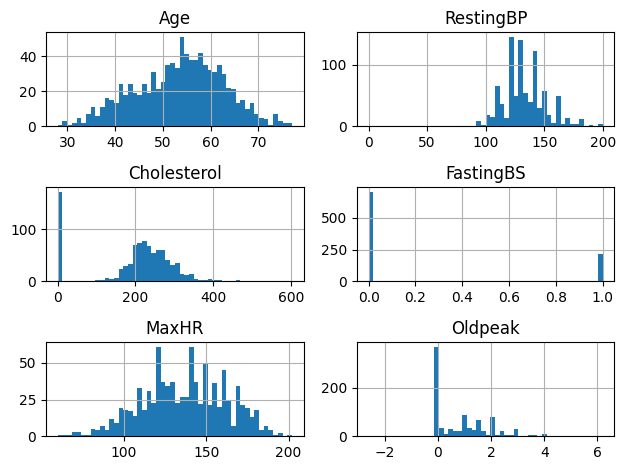

In [15]:
csv.drop(['HeartDisease'],1).hist(bins=50)
plt.tight_layout()

### Get Dummies

In [16]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
one_hot_csv = pd.get_dummies(df, drop_first=True)
one_hot_csv

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [18]:
one_hot_csv.shape

(746, 16)

In [19]:
one_hot_csv.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

In [20]:
X = np.array(one_hot_csv.drop(['HeartDisease'], axis = 1))
y = np.array(one_hot_csv['HeartDisease'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [22]:
X_train.shape

(596, 15)

In [23]:
X_test.shape

(150, 15)

### Regresión logística SIN escalado

In [24]:
model = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
y_pred = model.predict(X_test)

accuracy_score 0.887
precision_score 0.919
recall_score 0.861
f1_score 0.889
roc_auc_score 0.888


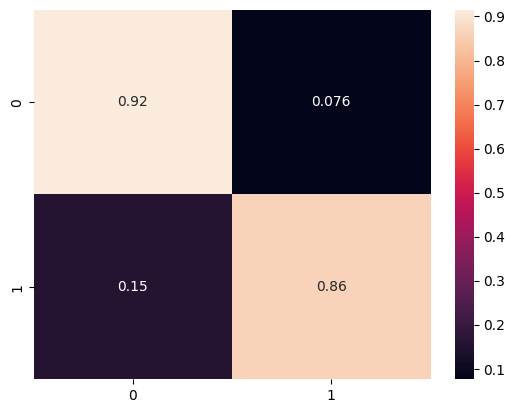

In [26]:
c_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('accuracy_score', accuracy_score(y_test,y_pred).round(3))
print('precision_score', precision_score(y_test, y_pred).round(3))
print('recall_score', recall_score(y_test, y_pred).round(3))
print('f1_score', f1_score(y_test, y_pred).round(3))
print('roc_auc_score', roc_auc_score(y_test, y_pred).round(3))

In [27]:
name='Logistic Regression'
kfold = KFold(n_splits=10) # Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')

msg_model_nonscl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_nonscl)

[0.875      0.85714286 0.88888889 0.93103448 0.81818182 0.78571429
 0.77419355 0.79166667 0.86206897 0.96428571]
Logistic Regression: 0.854818 (0.060020)


### Regresión logística CON Escalado

In [28]:
model_scl = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

model_scl.fit(X_train_scl, y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred_scl = model_scl.predict(X_test_scl)
y_pred_scl

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

accuracy_score 0.893
precision_score 0.932
recall_score 0.8607594936708861
f1_score 0.895
roc_auc_score 0.895


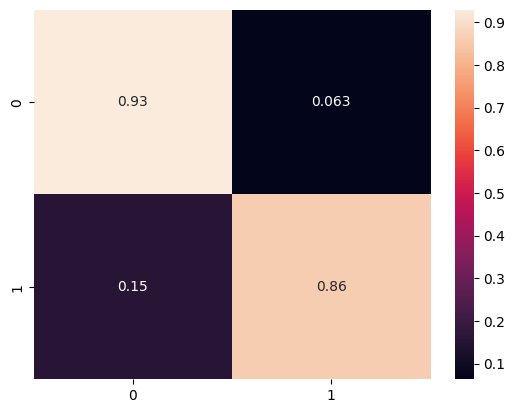

In [30]:
c_mat = confusion_matrix(y_test,y_pred_scl)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('accuracy_score', accuracy_score(y_test,y_pred_scl).round(3))
print('precision_score', precision_score(y_test, y_pred_scl).round(3))
print('recall_score', recall_score(y_test, y_pred_scl.round(3)))
print('f1_score', f1_score(y_test, y_pred_scl).round(3))
print('roc_auc_score', roc_auc_score(y_test, y_pred_scl).round(3))

In [31]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model_scl, X_train_scl, y_train, cv=kfold, scoring='recall')

msg_model_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_scl)

[0.875      0.85714286 0.85185185 0.82758621 0.81818182 0.75
 0.77419355 0.75       0.86206897 0.96428571]
Logistic Regression: 0.833031 (0.061861)


#### Comparamos métricas (Escalado/Sin Escalar)

In [32]:
print('Media y Desviación estándar en valización cruzada de la métrica RECALL:', '\n')
print('SIN StandardScaler ->', msg_model_nonscl)
print('CON StandardScaler ->', msg_model_scl)


Media y Desviación estándar en valización cruzada de la métrica RECALL: 

SIN StandardScaler -> Logistic Regression: 0.854818 (0.060020)
CON StandardScaler -> Logistic Regression: 0.833031 (0.061861)


In [33]:
# Sin escalar
print(accuracy_score(y_test,y_pred).round(3))
print(precision_score(y_test, y_pred).round(3))
print(recall_score(y_test, y_pred).round(3))
print(f1_score(y_test, y_pred).round(3))
print(roc_auc_score(y_test, y_pred).round(3))

0.887
0.919
0.861
0.889
0.888


In [34]:
# Escalado
print(accuracy_score(y_test,y_pred_scl).round(3))
print(precision_score(y_test, y_pred_scl).round(3))
print(recall_score(y_test, y_pred_scl).round(3))
print(f1_score(y_test, y_pred_scl).round(3))
print(roc_auc_score(y_test, y_pred_scl).round(3))

0.893
0.932
0.861
0.895
0.895


In [35]:
oh_accuracy_score_nonscl = accuracy_score(y_test,y_pred).round(3)
oh_precision_score_nonscl = precision_score(y_test, y_pred).round(3)
oh_recall_score_nonscl = recall_score(y_test, y_pred).round(3)
oh_f1_score_nonscl = f1_score(y_test, y_pred).round(3)
oh_roc_auc_score_nonscl = roc_auc_score(y_test, y_pred).round(3)
oh_accuracy_score_scl = precision_score(y_test, y_pred_scl).round(3)
oh_precision_score_scl = precision_score(y_test, y_pred_scl).round(3)
oh_recall_score_scl = recall_score(y_test, y_pred_scl).round(3)
oh_f1_score_scl = f1_score(y_test, y_pred_scl).round(3)
oh_roc_auc_score_scl = roc_auc_score(y_test, y_pred_scl).round(3)
accuracy = (oh_accuracy_score_nonscl,oh_accuracy_score_scl)
precision = (oh_precision_score_nonscl,oh_precision_score_scl)
recall = (oh_recall_score_nonscl,oh_recall_score_scl)
f1 = (oh_f1_score_nonscl,oh_f1_score_scl)
roc = (oh_roc_auc_score_nonscl,oh_roc_auc_score_scl)
scores_dict = {'acc':accuracy,'prec':precision,'rec':recall,'f1':f1,'roc':roc}
scores_df = pd.DataFrame(scores_dict, index=['not scaled','scaled'])
scores_df

,acc,prec,rec,f1,roc
not scaled,0.887,0.919,0.861,0.889,0.888
scaled,0.932,0.932,0.861,0.895,0.895
